<a href="https://colab.research.google.com/github/GavinKoli/FIFA2022/blob/main/DTMBA_Project_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DATA

In [11]:
from google.colab import drive
drive.mount('/content/drive')



with open('/content/drive/My Drive/Colab Notebooks/Master.csv', 'r') as f:
   data = f.read()


import pandas as pd
import matplotlib.pyplot as plt

with open('/content/drive/My Drive/Colab Notebooks/Master.csv', 'r', encoding='ISO-8859-1') as f:
    with open('Master_utf8.csv', 'w', encoding='utf-8') as f_utf8:
        f_utf8.write(f.read())
        df = pd.read_csv('Master_utf8.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CODE FOR CALCULATING PERCENTILES

In [12]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv('Master_utf8.csv')

# Calculate percentile values for the various columns
cols = ['Goals', 'Expected Goals (xG)', 'Successful dribbles', 'Shots on target',
        'Big chances created', 'Accurate final third passes', 'Assists',
        'Key passes', 'Accurate own half passes', 'Accurate passes',
        'Accurate opposition half passes', 'Tackles', 'Interceptions',
        'Clearances', 'Dribbled past', 'Ground duels won', 'Aerial duels won','Accurate long balls']
for col in cols:
    percentiles = df[col].rank(pct=True) * 100
    percentile_col_name = 'Percentile_' + col.replace(' ', '_')
    df[percentile_col_name] = percentiles

# Save the updated data to a new CSV file
df.to_csv('Master_with_percentiles.csv', index=False)


# SETTING THE PLAYING TIME FOR PLAYERS

In [13]:
Master_with_percentiles =df[df['Minutes played'] >= 180 ]

In [14]:
print(Master_with_percentiles)

    Ã¯Â»Â¿Country                      Name  Goals  Expected Goals (xG)  \
0        Portugal           Bruno Fernandes      2                 1.12   
1       Argentina              Lionel Messi      7                 6.62   
2          Poland      Wojciech SzczÃÂsny      0                 0.00   
4        Cameroon  Jean-Charles Castelletto      1                 0.95   
5         Germany            Joshua Kimmich      0                 0.36   
..            ...                       ...    ...                  ...   
648         Qatar               Homam Ahmed      0                 0.00   
649         Qatar                Almoez Ali      0                 0.36   
650       Germany              Manuel Neuer      0                 0.29   
660        Canada            Tajon Buchanan      0                 0.95   
664         Qatar     Meshaal Aissa Barsham      0                 0.00   

     Big chances missed  Successful dribbles  Successful dribbles %  \
0                     0     


#SETTING THE AGE LIMIT


In [15]:
NewMaster=Master_with_percentiles[Master_with_percentiles['Age'] <= 25 ]

In [16]:
print(NewMaster)

    Ã¯Â»Â¿Country                   Name  Goals  Expected Goals (xG)  \
6           Ghana         Mohammed Kudus      2                 0.83   
9          France       Kylian MbappÃÂ©      8                 5.26   
10        England            Bukayo Saka      3                 0.64   
12       Cameroon           Devis Epassy      0                 0.00   
18       Portugal            Diogo Dalot      0                 0.04   
..            ...                    ...    ...                  ...   
624        Serbia       SaÃÂ¡a LukiÃÂ      0                 0.06   
648         Qatar            Homam Ahmed      0                 0.00   
649         Qatar             Almoez Ali      0                 0.36   
660        Canada         Tajon Buchanan      0                 0.95   
664         Qatar  Meshaal Aissa Barsham      0                 0.00   

     Big chances missed  Successful dribbles  Successful dribbles %  \
6                     0                   10                  71

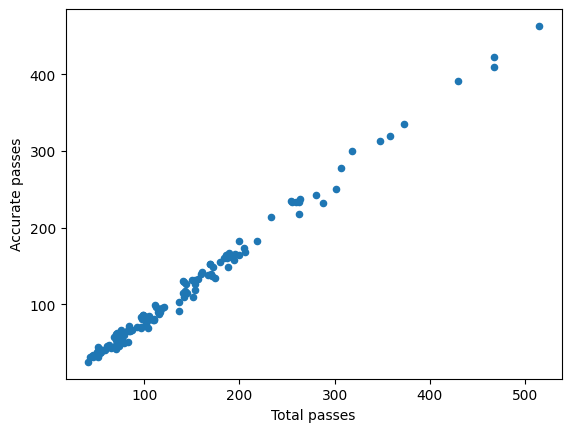

In [17]:
NewMaster.plot(x='Total passes', y='Accurate passes', kind='scatter')
plt.show()

# PER 90 CALCULATIONS

In [18]:
NewMaster['MinutesPer90'] = NewMaster['Minutes played'] / 90

<ipython-input-18-a8994e0fb96f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMaster['MinutesPer90'] = NewMaster['Minutes played'] / 90


In [19]:
NewMaster['Goals_Per90'] = NewMaster['Goals'] / NewMaster['MinutesPer90']
NewMaster['Expected Goals (xG)_Per90'] = NewMaster['Expected Goals (xG)'] / NewMaster['MinutesPer90']
NewMaster['Big chances missed_Per90'] = NewMaster['Big chances missed'] / NewMaster['MinutesPer90']
NewMaster['Successful dribbles_Per90'] = NewMaster['Successful dribbles'] / NewMaster['MinutesPer90']
NewMaster['Successful dribbles %_Per90'] = NewMaster['Successful dribbles %'] / NewMaster['MinutesPer90']
NewMaster['Total shots_Per90'] = NewMaster['Total shots'] / NewMaster['MinutesPer90']
NewMaster['Shots on target_Per90'] = NewMaster['Shots on target'] / NewMaster['MinutesPer90']
NewMaster['Shots off target_Per90'] = NewMaster['Shots off target'] / NewMaster['MinutesPer90']
NewMaster['Blocked shots_Per90'] = NewMaster['Blocked shots'] / NewMaster['MinutesPer90']
NewMaster['Goal conversion %_Per90'] = NewMaster['Goal conversion %'] / NewMaster['MinutesPer90']
NewMaster['Penalties taken_Per90'] = NewMaster['Penalties taken'] / NewMaster['MinutesPer90']
NewMaster['Penalty goals_Per90'] = NewMaster['Penalty goals'] / NewMaster['MinutesPer90']
NewMaster['Penalty won_Per90'] = NewMaster['Penalty won'] / NewMaster['MinutesPer90']
NewMaster['Shots from set piece_Per90'] = NewMaster['Shots from set piece'] / NewMaster['MinutesPer90']
NewMaster['Free kick goals_Per90'] = NewMaster['Free kick goals'] / NewMaster['MinutesPer90']
NewMaster['Goals from inside the box_Per90'] = NewMaster['Goals from inside the box'] / NewMaster['MinutesPer90']
NewMaster['Goals from outside the box_Per90'] = NewMaster['Goals from outside the box'] / NewMaster['MinutesPer90']
NewMaster['Headed goals_Per90'] = NewMaster['Headed goals'] / NewMaster['MinutesPer90']
NewMaster['Left foot goals_Per90'] = NewMaster['Left foot goals'] / NewMaster['MinutesPer90']
NewMaster['Right foot goals_Per90'] = NewMaster['Right foot goals'] / NewMaster['MinutesPer90']
NewMaster['Hit woodwork_Per90'] = NewMaster['Hit woodwork'] / NewMaster['MinutesPer90']
NewMaster['Offsides_Per90'] = NewMaster['Offsides'] / NewMaster['MinutesPer90']
NewMaster['Penalty conversion_Per90'] = NewMaster['Penalty conversion'] / NewMaster['MinutesPer90']
NewMaster['Set piece conversion %_Per90'] = NewMaster['Set piece conversion %'] / NewMaster['MinutesPer90']
NewMaster['Big chances created_Per90'] = NewMaster['Big chances created'] / NewMaster['MinutesPer90']
NewMaster['Total passes_Per90'] = NewMaster['Total passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate final third passes_Per90'] = NewMaster['Accurate final third passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate long balls_Per90'] = NewMaster['Accurate long balls'] / NewMaster['MinutesPer90']
NewMaster['Assists_Per90'] = NewMaster['Assists'] / NewMaster['MinutesPer90']
NewMaster['Accurate passes %_Per90'] = NewMaster['Accurate passes %'] / NewMaster['MinutesPer90']
NewMaster['Key passes_Per90'] = NewMaster['Key passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate long balls %_Per90'] = NewMaster['Accurate long balls %'] / NewMaster['MinutesPer90']
NewMaster['Accurate own half passes_Per90'] = NewMaster['Accurate own half passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate crosses_Per90'] = NewMaster['Accurate crosses'] / NewMaster['MinutesPer90']
NewMaster['Passes to assist_Per90'] = NewMaster['Passes to assist'] / NewMaster['MinutesPer90']
NewMaster['Accurate passes_Per90'] = NewMaster['Accurate passes'] / NewMaster['MinutesPer90']
NewMaster['Inaccurate passes_Per90'] = NewMaster['Inaccurate passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate opposition half passes_Per90'] = NewMaster['Accurate opposition half passes'] / NewMaster['MinutesPer90']
NewMaster['Accurate crosses %_Per90'] = NewMaster['Accurate crosses %'] / NewMaster['MinutesPer90']
NewMaster['Tackles_Per90'] = NewMaster['Tackles'] / NewMaster['MinutesPer90']
NewMaster['Interceptions_Per90'] = NewMaster['Interceptions'] / NewMaster['MinutesPer90']
NewMaster['Penalty committed_Per90'] = NewMaster['Penalty committed'] / NewMaster['MinutesPer90']
NewMaster['Clearances_Per90'] = NewMaster['Clearances'] / NewMaster['MinutesPer90']
NewMaster['Errors lead to goal_Per90'] = NewMaster['Errors lead to goal'] / NewMaster['MinutesPer90']
NewMaster['Errors lead to shot_Per90'] = NewMaster['Errors lead to shot'] / NewMaster['MinutesPer90']
NewMaster['Own goals_Per90'] = NewMaster['Own goals'] / NewMaster['MinutesPer90']
NewMaster['Dribbled past_Per90'] = NewMaster['Dribbled past'] / NewMaster['MinutesPer90']
NewMaster['Clean sheets_Per90'] = NewMaster['Clean sheets'] / NewMaster['MinutesPer90']
NewMaster['Ground duels won_Per90'] = NewMaster['Ground duels won'] / NewMaster['MinutesPer90']
NewMaster['Total duels won_Per90'] = NewMaster['Total duels won'] / NewMaster['MinutesPer90']
NewMaster['Aerial duels won %_Per90'] = NewMaster['Aerial duels won %'] / NewMaster['MinutesPer90']
NewMaster['Aerial duels won_Per90'] = NewMaster['Aerial duels won'] / NewMaster['MinutesPer90']

<ipython-input-19-2af43bc1eddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMaster['Goals_Per90'] = NewMaster['Goals'] / NewMaster['MinutesPer90']
<ipython-input-19-2af43bc1eddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewMaster['Expected Goals (xG)_Per90'] = NewMaster['Expected Goals (xG)'] / NewMaster['MinutesPer90']
<ipython-input-19-2af43bc1eddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [20]:
NewMaster.to_csv('NewMaster_updated.csv', index=False)

In [21]:
NewMaster_updated = pd.read_csv('NewMaster_updated.csv')
print(NewMaster_updated)

    Ã¯Â»Â¿Country                   Name  Goals  Expected Goals (xG)  \
0           Ghana         Mohammed Kudus      2                 0.83   
1          France       Kylian MbappÃÂ©      8                 5.26   
2         England            Bukayo Saka      3                 0.64   
3        Cameroon           Devis Epassy      0                 0.00   
4        Portugal            Diogo Dalot      0                 0.04   
..            ...                    ...    ...                  ...   
120        Serbia       SaÃÂ¡a LukiÃÂ      0                 0.06   
121         Qatar            Homam Ahmed      0                 0.00   
122         Qatar             Almoez Ali      0                 0.36   
123        Canada         Tajon Buchanan      0                 0.95   
124         Qatar  Meshaal Aissa Barsham      0                 0.00   

     Big chances missed  Successful dribbles  Successful dribbles %  \
0                     0                   10                  71

# SEARCH FOR A STRIKER

In [22]:
pip install shap

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('NewMaster_updated.csv')

# Define the seven attributes
attributes = ['Goals_Per90', 'Expected Goals (xG)_Per90', 'Shots on target_Per90', 'Successful dribbles_Per90', 'Aerial duels won_Per90',
              'Assists_Per90', 'Key passes_Per90', 'Big chances created_Per90']

# Get user preferences for each attribute
user_preferences = []
for attribute in attributes:
    preference = input("Enter your preference value for " + attribute + " (1-10): ")
    user_preferences.append(int(preference))

# Normalize the columns using Z-score normalization
scaler = StandardScaler()
data[attributes] = scaler.fit_transform(data[attributes])

# Weight the attributes based on user preferences
attribute_weights = [preference / sum(user_preferences) for preference in user_preferences]

# Compute the total score for each player
data['Total'] = 0
for i, attribute in enumerate(attributes):
    data['Total'] += data[attribute] * attribute_weights[i]

# Train a linear regression model to predict the total score
X = data[attributes]
y = data['Total']
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same data
data['Predicted Total'] = model.predict(X)

# Sort the data by the predicted total score and select the top 10 players
data = data.sort_values(by='Predicted Total', ascending=False)
top_10ST = data.head(10)

# Print the top 10 players and their predicted total scores
print(top_10ST[['Name', 'Predicted Total']])


Enter your preference value for Goals_Per90 (1-10): 10
Enter your preference value for Expected Goals (xG)_Per90 (1-10): 10
Enter your preference value for Shots on target_Per90 (1-10): 10
Enter your preference value for Successful dribbles_Per90 (1-10): 10
Enter your preference value for Aerial duels won_Per90 (1-10): 1
Enter your preference value for Assists_Per90 (1-10): 1
Enter your preference value for Key passes_Per90 (1-10): 1
Enter your preference value for Big chances created_Per90 (1-10): 1
                     Name  Predicted Total
1        Kylian MbappÃÂ©         3.733980
65          Jamal Musiala         2.601656
0          Mohammed Kudus         2.087147
5             Richarlison         1.659056
34   JuliÃÂ¡n ÃÂlvarez         1.584907
30      Randal Kolo Muani         1.557826
2             Bukayo Saka         1.527645
15             Ritsu Doan         1.525590
100       Alphonso Davies         1.517178
99           Breel Embolo         1.310861


# PRINTING GRAPH FOR STRIKER

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


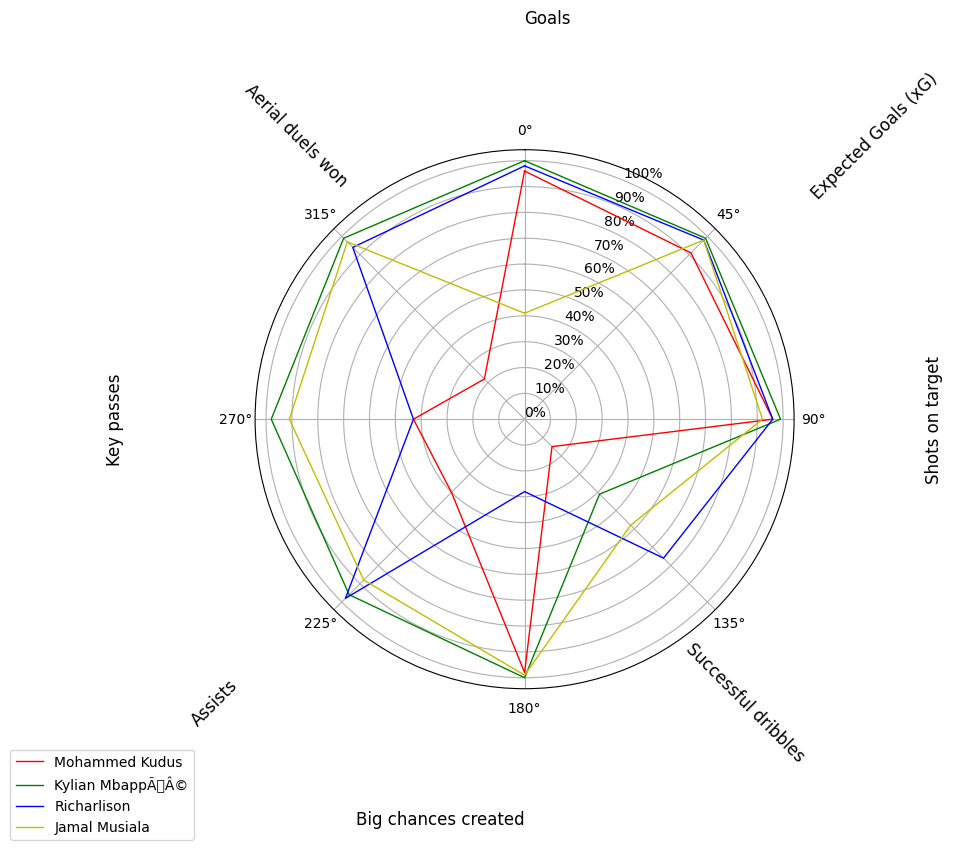

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib.ticker as mtick

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Master_utf8.csv', encoding='utf-8')

# Select the top 4 players from the top_10 data frame
top_4 = top_10ST.head(4)

# Get the data for the four players
df = NewMaster.loc[NewMaster['Name'].isin(top_4['Name'].tolist())].set_index('Name')

# Select the columns for the radar chart
percentile_cols = ['Percentile_Goals', 'Percentile_Expected_Goals_(xG)', 'Percentile_Shots_on_target', 'Percentile_Aerial_duels_won',
                   'Percentile_Successful_dribbles', 'Percentile_Big_chances_created', 'Percentile_Assists',
                   'Percentile_Key_passes']
df = df[percentile_cols]

# Convert the percentile values to integers
df = df.astype(int)

# Calculate the number of attributes
num_attributes = len(df.columns)

# Create a list of attribute names
attributes = ['Goals', 'Expected Goals (xG)', 'Shots on target', 'Successful dribbles', 'Big chances created', 'Assists', 'Key passes','Aerial duels won']

# Create a list of attribute values for each player
values = df.values.tolist()

# Calculate the angle for each attribute in the radar chart
angles = [n / float(num_attributes) * 2 * pi for n in range(num_attributes)]
angles += angles[:1]

# Create a subplot with a polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Set the clockwise direction for the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw the radar chart for each player
colors = ['r', 'g', 'b', 'y']
for i in range(len(df)):
    values_i = values[i]
    values_i += values_i[:1]
    ax.plot(angles, values_i, linewidth=1, linestyle='solid', label=df.index[i], color=colors[i])

# Add the attribute labels
label_distance = 155
for i in range(num_attributes):
    angle_rad = i / float(num_attributes) * 2 * pi
    angle_deg = i / float(num_attributes) * 360
    if angle_deg <= 90 or angle_deg > 270:
        ha = 'left'
        va = 'center'
        angle_rotate = angle_deg
    else:
        ha = 'right'
        va = 'center'
        angle_rotate = angle_deg + 180
    ax.text(angle_rad, label_distance, attributes[i], ha=ha, va=va, fontsize=12, rotation=angle_rotate)

# Set the radial axis ticks and labels
ax.set_rticks(range(0, 101, 10))  # Set radial ticks for percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the color of the ticks for increments of 10 to black and increments of 5 to gray
for tick in ax.yaxis.get_ticklabels():
    tick_loc = tick.get_text().replace('%', '')  # Remove the '%' sign
    if tick_loc != '':
        tick_loc = int(tick_loc)  # Convert to integer
        if tick_loc % 10 == 0:
            tick.set_color('black')
        elif tick_loc % 5 == 0:
            tick.set_color('gray')

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(-0.1, -0.1))

# Show the chart
plt.show()


# SEARCH FOR A DEFENSIVE MIDFIELDERS

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('NewMaster_updated.csv')

# Define the seven attributes
attributes = ['Accurate passes_Per90', 'Accurate opposition half passes_Per90', 'Aerial duels won_Per90',
              'Ground duels won_Per90', 'Interceptions_Per90', 'Tackles_Per90', 'Clearances_Per90']

# Get user preferences for each attribute
user_preferences = []
for attribute in attributes:
    preference = input("Enter your preference value for " + attribute + " (1-10): ")
    user_preferences.append(int(preference))

# Normalize the columns using Z-score normalization
scaler = StandardScaler()
data[attributes] = scaler.fit_transform(data[attributes])

# Weight the attributes based on user preferences
attribute_weights = [preference / sum(user_preferences) for preference in user_preferences]

# Compute the total score for each player
data['Total'] = 0
for i, attribute in enumerate(attributes):
    data['Total'] += data[attribute] * attribute_weights[i]

# Train a linear regression model to predict the total score
X = data[attributes]
y = data['Total']
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same data
data['Predicted Total'] = model.predict(X)

# Sort the data by the predicted total score and select the top 10 players
data = data.sort_values(by='Predicted Total', ascending=False)
top_10CDM = data.head(10)

# Print the top 10 players and their predicted total scores
print(top_10CDM[['Name', 'Predicted Total']])


KeyboardInterrupt: Interrupted by user

# PRINTING GRAPH FOR DEFENSIVE MIDFIELDER

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib.ticker as mtick

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Master_utf8.csv', encoding='utf-8')

# Select the top 4 players from the top_10 data frame
top_4 = top_10CDM.head(4)

# Get the data for the four players
df = NewMaster.loc[NewMaster['Name'].isin(top_4['Name'].tolist())].set_index('Name')

# Select the columns for the radar chart
percentile_cols = ['Percentile_Accurate_opposition_half_passes','Percentile_Aerial_duels_won','Percentile_Ground_duels_won',
                   'Percentile_Interceptions','Percentile_Tackles','Percentile_Clearances']
df = df[percentile_cols]

# Convert the percentile values to integers
df = df.astype(int)

# Calculate the number of attributes
num_attributes = len(df.columns)

# Create a list of attribute names
attributes = ['Accurate opposition half passes', 'Aerial duels won', 'Ground duels won', 'Interceptions', 'Tackles', 'Clearances']

# Create a list of attribute values for each player
values = df.values.tolist()

# Calculate the angle for each attribute in the radar chart
angles = [n / float(num_attributes) * 2 * pi for n in range(num_attributes)]
angles += angles[:1]

# Create a subplot with a polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Set the clockwise direction for the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw the radar chart for each player
colors = ['r', 'g', 'b', 'y']
for i in range(len(df)):
    values_i = values[i]
    values_i += values_i[:1]
    ax.plot(angles, values_i, linewidth=1, linestyle='solid', label=df.index[i], color=colors[i])

# Add the attribute labels
label_distance = 145
for i in range(num_attributes):
    angle_rad = i / float(num_attributes) * 2 * pi
    angle_deg = i / float(num_attributes) * 360
    if angle_deg <= 90 or angle_deg > 270:
        ha = 'left'
        va = 'center'
        angle_rotate = angle_deg
    else:
        ha = 'right'
        va = 'center'
        angle_rotate = angle_deg + 180
    ax.text(angle_rad, label_distance, attributes[i], ha=ha, va=va, fontsize=12, rotation=angle_rotate)

# Set the radial axis ticks and labels
ax.set_rticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the color of the ticks for increments of 10 to black and increments of 5 to gray
for tick in ax.yaxis.get_major_ticks():
    tick_loc = tick.label.get_text()
    if tick_loc != '':
        tick_loc = int(tick_loc)
        if tick_loc % 10 == 0:
            tick.label1.set_color('black')
        elif tick_loc % 5 == 0:
            tick.label1.set_color('gray')

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(-0.1, -0.1))

# Show the chart
plt.show()


# SEARCH FOR A PLAYMAKING MIDFIELDER

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('NewMaster_updated.csv')

# Define the seven attributes
attributes = ['Accurate final third passes_Per90','Big chances created_Per90','Assists_Per90','Ground duels won_Per90',
              'Interceptions_Per90','Accurate long balls_Per90','Key passes_Per90','Accurate passes_Per90']

# Get user preferences for each attribute
user_preferences = []
for attribute in attributes:
    preference = input("Enter your preference value for " + attribute + " (1-10): ")
    user_preferences.append(int(preference))

# Normalize the columns using Z-score normalization
scaler = StandardScaler()
data[attributes] = scaler.fit_transform(data[attributes])

# Weight the attributes based on user preferences
attribute_weights = [preference / sum(user_preferences) for preference in user_preferences]

# Compute the total score for each player
data['Total'] = 0
for i, attribute in enumerate(attributes):
    data['Total'] += data[attribute] * attribute_weights[i]

# Train a linear regression model to predict the total score
X = data[attributes]
y = data['Total']
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same data
data['Predicted Total'] = model.predict(X)

# Sort the data by the predicted total score and select the top 10 players
data = data.sort_values(by='Predicted Total', ascending=False)
top_10CM = data.head(10)

# Print the top 10 players and their predicted total scores
print(top_10CM[['Name', 'Predicted Total']])


# PRINTING GRAPH FOR PLAYMAKING MIDFIELDER

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib.ticker as mtick

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Master_utf8.csv', encoding='utf-8')

# Select the top 4 players from the top_10 data frame
top_4 = top_10CM.head(4)

# Get the data for the four players
df = NewMaster.loc[NewMaster['Name'].isin(top_4['Name'].tolist())].set_index('Name')

# Select the columns for the radar chart
percentile_cols = ['Percentile_Interceptions','Percentile_Ground_duels_won','Percentile_Accurate_final_third_passes',
              'Percentile_Big_chances_created','Percentile_Assists','Percentile_Accurate_long_balls','Percentile_Key_passes','Percentile_Accurate_passes']
df = df[percentile_cols]

# Convert the percentile values to integers
df = df.astype(int)

# Calculate the number of attributes
num_attributes = len(df.columns)

# Create a list of attribute names
attributes = ['Accurate long balls','Ground duels won','Accurate final third passes','Interceptions',
              'Big chances created','Assists','Key passes','Accurate passes']


# Create a list of attribute values for each player
values = df.values.tolist()

# Calculate the angle for each attribute in the radar chart
angles = [n / float(num_attributes) * 2 * pi for n in range(num_attributes)]
angles += angles[:1]

# Create a subplot with a polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Set the clockwise direction for the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw the radar chart for each player
colors = ['r', 'g', 'b', 'y']
for i in range(len(df)):
    values_i = values[i]
    values_i += values_i[:1]
    ax.plot(angles, values_i, linewidth=1, linestyle='solid', label=df.index[i], color=colors[i])

# Add the attribute labels
label_distance = 150
for i in range(num_attributes):
    angle_rad = i / float(num_attributes) * 2 * pi
    angle_deg = i / float(num_attributes) * 360
    if angle_deg <= 90 or angle_deg > 270:
        ha = 'left'
        va = 'center'
        angle_rotate = angle_deg
    else:
        ha = 'right'
        va = 'center'
        angle_rotate = angle_deg + 180
    ax.text(angle_rad, label_distance, attributes[i], ha=ha, va=va, fontsize=12, rotation=angle_rotate)

# Set the radial axis ticks and labels
ax.set_rticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the color of the ticks for increments of 10 to black and increments of 5 to gray
for tick in ax.yaxis.get_major_ticks():
    tick_loc = tick.label.get_text()
    if tick_loc != '':
        tick_loc = int(tick_loc)
        if tick_loc % 10 == 0:
            tick.label1.set_color('black')
        elif tick_loc % 5 == 0:
            tick.label1.set_color('gray')

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(-0.1,- 0.1))

# Show the chart
plt.show()


# SEARCH FOR A CENTER BACK

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('NewMaster_updated.csv')

# Define the seven attributes
attributes = ['Accurate own half passes_Per90','Aerial duels won_Per90','Accurate opposition half passes_Per90', 'Big chances created_Per90',
              'Ground duels won_Per90','Interceptions_Per90','Tackles_Per90','Clearances_Per90']

# Get user preferences for each attribute
user_preferences = []
for attribute in attributes:
    preference = input("Enter your preference value for " + attribute + " (1-10): ")
    user_preferences.append(int(preference))

# Normalize the columns using Z-score normalization
scaler = StandardScaler()
data[attributes] = scaler.fit_transform(data[attributes])

# Weight the attributes based on user preferences
attribute_weights = [preference / sum(user_preferences) for preference in user_preferences]

# Compute the total score for each player
data['Total'] = 0
for i, attribute in enumerate(attributes):
    data['Total'] += data[attribute] * attribute_weights[i]

# Train a linear regression model to predict the total score
X = data[attributes]
y = data['Total']
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same data
data['Predicted Total'] = model.predict(X)

# Sort the data by the predicted total score and select the top 10 players
data = data.sort_values(by='Predicted Total', ascending=False)
top_10CB = data.head(10)

# Print the top 10 players and their predicted total scores
print(top_10CB[['Name', 'Predicted Total']])


# PRINTING GRAPH FOR CENTER BACK

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib.ticker as mtick

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Master_utf8.csv', encoding='utf-8')

# Select the top 4 players from the top_10 data frame
top_4 = top_10CB.head(4)

# Get the data for the four players
df = NewMaster.loc[NewMaster['Name'].isin(top_4['Name'].tolist())].set_index('Name')

# Select the columns for the radar chart
percentile_cols = ['Percentile_Accurate_own_half_passes','Percentile_Aerial_duels_won','Percentile_Accurate_opposition_half_passes','Percentile_Big_chances_created',
              'Percentile_Ground_duels_won','Percentile_Interceptions','Percentile_Tackles','Percentile_Clearances']
df = df[percentile_cols]

# Convert the percentile values to integers
df = df.astype(int)

# Calculate the number of attributes
num_attributes = len(df.columns)

# Create a list of attribute names
attributes = ['Accurate own half passes','Aerial duels won','Accurate opposition half passes','Tackles',
              'Ground duels won','Interceptions','Big chances created','Clearances']


# Create a list of attribute values for each player
values = df.values.tolist()

# Calculate the angle for each attribute in the radar chart
angles = [n / float(num_attributes) * 2 * pi for n in range(num_attributes)]
angles += angles[:1]

# Create a subplot with a polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Set the clockwise direction for the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw the radar chart for each player
colors = ['r', 'g', 'b', 'y']
for i in range(len(df)):
    values_i = values[i]
    values_i += values_i[:1]
    ax.plot(angles, values_i, linewidth=1, linestyle='solid', label=df.index[i], color=colors[i])

# Add the attribute labels
label_distance = 140
for i in range(num_attributes):
    angle_rad = i / float(num_attributes) * 2 * pi
    angle_deg = i / float(num_attributes) * 360
    if angle_deg <= 90 or angle_deg > 270:
        ha = 'left'
        va = 'center'
        angle_rotate = angle_deg
    else:
        ha = 'right'
        va = 'center'
        angle_rotate = angle_deg + 180
    ax.text(angle_rad, label_distance, attributes[i], ha=ha, va=va, fontsize=12, rotation=angle_rotate)

# Set the radial axis ticks and labels
ax.set_rticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the color of the ticks for increments of 10 to black and increments of 5 to gray
for tick in ax.yaxis.get_major_ticks():
    tick_loc = tick.label.get_text()
    if tick_loc != '':
        tick_loc = int(tick_loc)
        if tick_loc % 10 == 0:
            tick.label1.set_color('black')
        elif tick_loc % 5 == 0:
            tick.label1.set_color('gray')

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(-0.1, -0.1))

# Show the chart
plt.show()


# Future

Gotta add market value analysis too

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance
import shap

# Load data from CSV file
data = pd.read_csv('NewMaster_updated.csv')

# Data exploration and cleaning
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isna().sum())

# Visualize the data
sns.pairplot(data)
plt.show()

# Define the seven attributes
attributes = ['Goals_Per90', 'Expected Goals (xG)_Per90', 'Shots on target_Per90', 'Successful dribbles_Per90', 'Aerial duels won_Per90',
              'Assists_Per90', 'Key passes_Per90', 'Big chances created_Per90']

# Get user preferences for each attribute
user_preferences = []
for attribute in attributes:
    preference = input("Enter your preference value for " + attribute + " (1-10): ")
    user_preferences.append(int(preference))

# Normalize the columns using Z-score normalization
scaler = StandardScaler()
data[attributes] = scaler.fit_transform(data[attributes])

# Feature selection using SelectKBest
selector = SelectKBest(f_regression, k=4)
selector.fit(data[attributes], data['Total'])
selected_attributes = [attributes[i] for i in selector.get_support(indices=True)]
print("Selected attributes:", selected_attributes)

# Weight the attributes based on user preferences
attribute_weights = [preference / sum(user_preferences) for preference in user_preferences]

# Compute the total score for each player
data['Total'] = 0
for i, attribute in enumerate(selected_attributes):
    data['Total'] += data[attribute] * attribute_weights[i]
# Model evaluation using various metrics
X_train, X_test, y_train, y_test = train_test_split(data[selected_attributes], data['Total'], test_size=0.2, random_state=42)
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)
print("Training set metrics:")
print(f"Mean Absolute Error: {mae_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"R-squared: {r2_train}")
print("\n")
print("Test set metrics:")
print(f"Mean Absolute Error: {mae_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"R-squared: {r2_test}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib.ticker as mtick

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Master_utf8.csv', encoding='utf-8')

# Select the top 4 players from the top_10 data frame
top_4 = top_10ST.head(4)

# Get the data for the four players
df = NewMaster.loc[NewMaster['Name'].isin(top_4['Name'].tolist())].set_index('Name')

# Select the columns for the radar chart
percentile_cols = ['Percentile_Goals', 'Percentile_Expected_Goals_(xG)', 'Percentile_Shots_on_target', 'Percentile_Aerial_duels_won',
                   'Percentile_Successful_dribbles', 'Percentile_Big_chances_created', 'Percentile_Assists',
                   'Percentile_Key_passes']
df = df[percentile_cols]

# Convert the percentile values to integers
df = df.astype(int)

# Calculate the number of attributes
num_attributes = len(df.columns)

# Create a list of attribute names
attributes = ['Goals', 'Expected Goals (xG)', 'Shots on target', 'Successful dribbles', 'Big chances created', 'Assists', 'Key passes','Aerial duels won']

# Create a list of attribute values for each player
values = df.values.tolist()

# Calculate the angle for each attribute in the radar chart
angles = [n / float(num_attributes) * 2 * pi for n in range(num_attributes)]
angles += angles[:1]

# Create a subplot with a polar projection
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Set the clockwise direction for the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw the radar chart for each player
colors = ['r', 'g', 'b', 'y']
for i in range(len(df)):
    values_i = values[i]
    values_i += values_i[:1]
    ax.plot(angles, values_i, linewidth=1, linestyle='solid', label=df.index[i], color=colors[i])

# Add the attribute labels
label_distance = 155
for i in range(num_attributes):
    angle_rad = i / float(num_attributes) * 2 * pi
    angle_deg = i / float(num_attributes) * 360
    if angle_deg <= 90 or angle_deg > 270:
        ha = 'left'
        va = 'center'
        angle_rotate = angle_deg
    else:
        ha = 'right'
        va = 'center'
        angle_rotate = angle_deg + 180
    ax.text(angle_rad, label_distance, attributes[i], ha=ha, va=va, fontsize=12, rotation=angle_rotate)

# Set the radial axis ticks and labels
ax.set_rticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the color of the ticks for increments of 10 to black and increments of 5 to gray
for tick in ax.yaxis.get_major_ticks():
    tick_loc = tick.label.get_text()
    if tick_loc != '':
        tick_loc = int(tick_loc)
        if tick_loc % 10 == 0:
            tick.label1.set_color('black')
        elif tick_loc % 5 == 0:
            tick.label1.set_color('gray')

# Set the legend outside the chart
plt.legend(bbox_to_anchor=(-0.1, -0.1))

# Show the chart
plt.show()
